# First Hands on Project using Multi-Class Classification models
## In this project I will use the TensorFlow data set provided

* Module: tf.keras.datasets.cifar10

In [1]:
# Import neccesary library 
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Data extract
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

2023-06-30 11:48:42.906037: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


170498071/170498071 [==============================] - 15s 0us/step


In [2]:
# Show the first train_data and the first train_labels
print(f'Train Sample:\n{train_data[0]}\n')
print(f'Train Label:\n{train_labels[0]}\n')

Train Sample:
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]

Train Label:
[6]



In [4]:
# Now I want to see the shape of the train_data & train_labels I am working with
train_data[0].shape, train_labels[0].shape

((32, 32, 3), (1,))

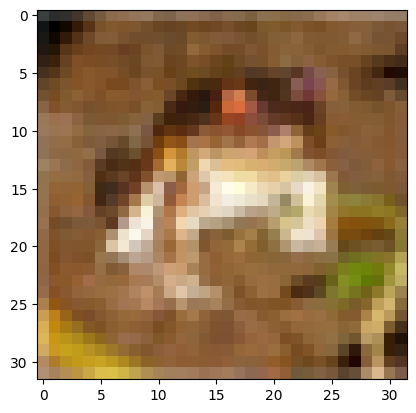

In [5]:
# See the train_data
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [6]:
# What label is with this train_data[0]
train_labels[0]

array([6], dtype=uint8)

In [8]:
# Create a human readable list to identify the images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
len(class_names)

10

Text(0.5, 1.0, 'dog')

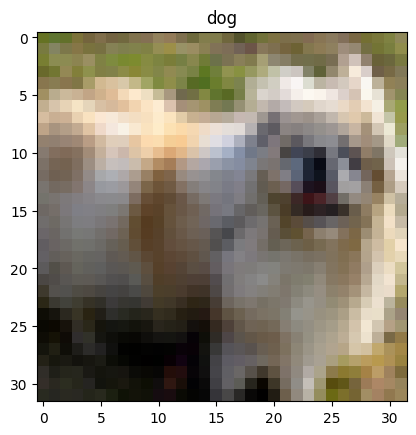

In [20]:
# Assuming you have a tensor 'train_labels' with shape (1,) or (1, 1)
train_labels = tf.reshape(train_labels, shape=(train_labels.shape[0],))

# Now I want to plot an example image with ITS ^^ class_name label
index_choice=40
plt.imshow(train_data[index_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_choice]])

In [21]:
# Want to see the shape of the Tensor
train_labels.shape

TensorShape([50000])

In [22]:
# I want to see how the train_labels index prints out
print(f'Example: {train_labels[40]}')

Example: 5


In [23]:
len(train_labels)

50000

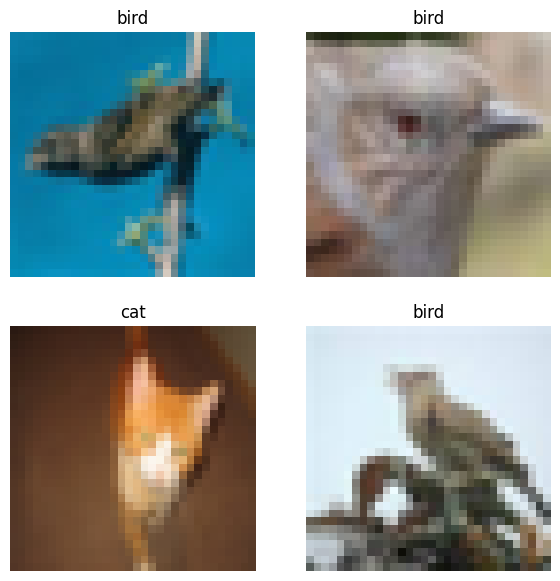

In [25]:
# Plot multiple random images of cifar10
import random
import matplotlib.pyplot as plt

# Set the figure size for the subplots
plt.figure(figsize=(7, 7))

# Iterate over 4 subplots
for i in range(4):
    # Create a subplot at position i+1 in a 2x2 grid
    ax = plt.subplot(2, 2, i+1)
    
    # Generate a random index within the range of the train_data length
    rand_index = random.choice(range(len(train_data)))
    
    # Display the image corresponding to the random index
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    
    # Set the title of the subplot as the class name corresponding to the random index label
    plt.title(class_names[train_labels[rand_index]])
    
    # Disable axis labels and ticks
    plt.axis(False)


## Build the multi-class classification model
* Find the input shape (32, 32, 3)
* Find the output shape (10) 10 labels 
* What loss function to use
* Ouput layer function `softmax` since working with a multi-class

* If labels are one-hot encoding use `tf.keras.losses.CategoricalCrossentropy()`,
* If the labels are not one-hot encoding use `tf.keras.losses.SparseCategoricalCrossentropy()`

In [27]:
# Input shape
train_data[0].shape

# So have a widht, hieght, and color channel in the train_data

(32, 32, 3)

In [32]:
# What does the flatten layer do to the model???
flatten = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(32, 32, 3))])
flatten.output_shape

(None, 3072)

In [39]:
## Build a model before normalized data

# Seed
tf.random.set_seed(42)


# Build the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
non_norm_history = model_1.fit(train_data,
                               train_labels,
                               epochs=10,
                               validation_data=(test_data, test_labels))

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.6629 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3028 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy:

In [34]:
# Look at the model_1 summary()
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 4)                 12292     
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 12,362
Trainable params: 12,362
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Min and Max values of the train_data -> might have to normalized the data
train_data.min(), train_data.max()

(0, 255)

In [36]:
# Can get training data and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

# Check the min and max values of the train_data_norm and the test_data_norm
train_data_norm.min(), test_data_norm.max()

(0.0, 1.0)

In [40]:
# Build a model using the normalization data

# Seed 
tf.random.set_seed(42)

# Build Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the Model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the Model
norm_history = model_2.fit(train_data_norm,
                           train_labels,
                           epochs=10,
                           validation_data=(test_data_norm, test_labels))

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 2.1697 - accuracy: 0.1553 - val_loss: 2.0884 - val_accuracy: 0.1761
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0757 - accuracy: 0.1786 - val_loss: 2.0840 - val_accuracy: 0.1722
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0660 - accuracy: 0.1837 - val_loss: 2.1047 - val_accuracy: 0.1670
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 2.0638 - accuracy: 0.1858 - val_loss: 2.0621 - val_accuracy: 0.1818
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0577 - accuracy: 0.1865 - val_loss: 2.0645 - val_accuracy: 0.1920
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0545 - accuracy: 0.1894 - val_loss: 2.0453 - val_accuracy: 0.1955
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0546 - accuracy: 0.1881 - val_loss: 2.0490 - val_accuracy:

<AxesSubplot: title={'center': 'Normalize data'}>

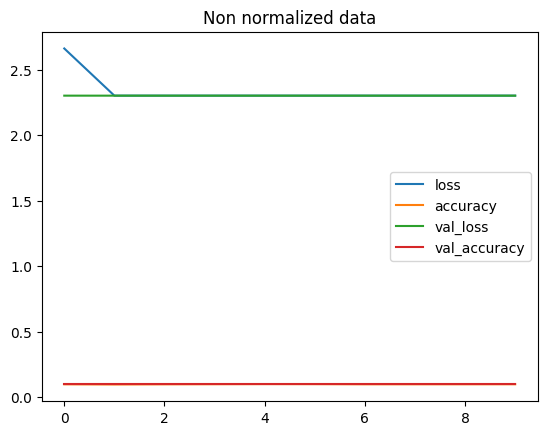

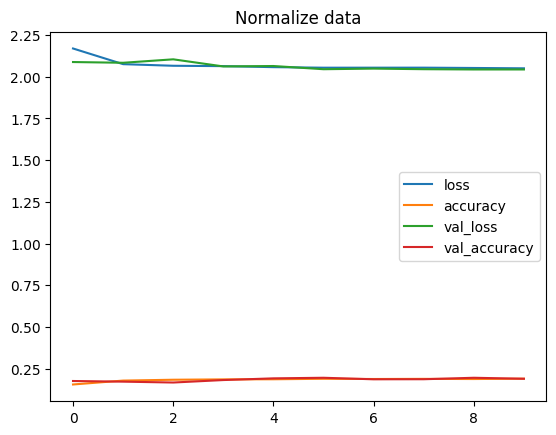

In [41]:
# Compare on both the Non-normalized data and the normalized data
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title="Non normalized data")

pd.DataFrame(norm_history.history).plot(title="Normalize data")

## Find the ideal learning rate 

In [44]:
# USE CALLBACK EPOCHS

# Seed
tf.random.set_seed(42)


# Build Model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# CALLBACK 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10 **(epoch/20))


# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# Fit the model
find_lr_history = model_3.fit(train_data_norm,
                              train_labels, 
                              epochs=40, 
                              validation_data=(test_data_norm, test_labels),
                              callbacks=[lr_scheduler])

Epoch 1/40
1563/1563 [==============================] - 7s 4ms/step - loss: 2.1518 - accuracy: 0.1601 - val_loss: 2.0844 - val_accuracy: 0.1665 - lr: 0.0010
Epoch 2/40
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0746 - accuracy: 0.1770 - val_loss: 2.1020 - val_accuracy: 0.1746 - lr: 0.0011
Epoch 3/40
1563/1563 [==============================] - 4s 3ms/step - loss: 2.0667 - accuracy: 0.1848 - val_loss: 2.0789 - val_accuracy: 0.1785 - lr: 0.0013
Epoch 4/40
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0629 - accuracy: 0.1873 - val_loss: 2.0851 - val_accuracy: 0.1805 - lr: 0.0014
Epoch 5/40
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0602 - accuracy: 0.1859 - val_loss: 2.0500 - val_accuracy: 0.1877 - lr: 0.0016
Epoch 6/40
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0602 - accuracy: 0.1884 - val_loss: 2.0501 - val_accuracy: 0.1924 - lr: 0.0018
Epoch 7/40
1563/1563 [==============================] - 5s

Text(0.5, 1.0, 'Find The Ideal Learning Rate')

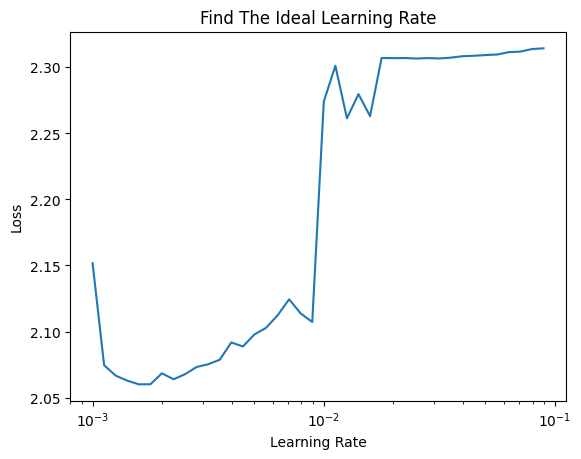

In [46]:
# Now I want to plot the learning rate Curve delay
import matplotlib.pyplot as plt
import pandas as pd

lrs=1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Find The Ideal Learning Rate")

In [47]:
10 ** -3

0.001

In [48]:
# Fit the model with the ideal learning rate * 0.001 * 


# Set seed
tf.random.set_seed(42)

# Build model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history_4=model_4.fit(train_data_norm,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data_norm, test_labels))

Epoch 1/20
1563/1563 [==============================] - 6s 3ms/step - loss: 2.3031 - accuracy: 0.0999 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0965 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy:

<AxesSubplot: title={'center': 'Normalized data'}>

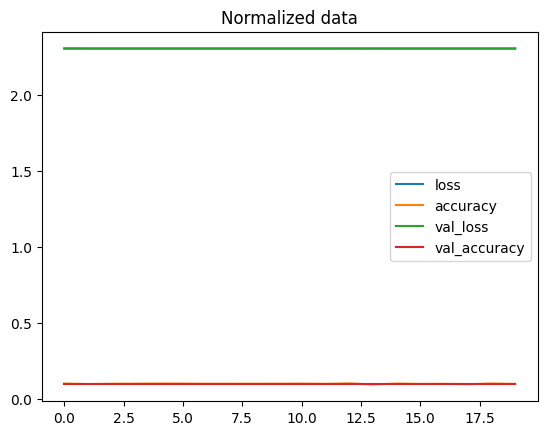

In [49]:
pd.DataFrame(history_4.history).plot(title="Normalized data")

In [50]:
model_4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 3072)              0         
                                                                 
 dense_21 (Dense)            (None, 10)                30730     
                                                                 
 dense_22 (Dense)            (None, 10)                110       
                                                                 
 dense_23 (Dense)            (None, 10)                110       
                                                                 
Total params: 30,950
Trainable params: 30,950
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Maybe need to add more layers to my Model 
# Total of 6 layers

# Set seed
tf.random.set_seed(42)

# Build model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# Fit the model
history_4=model_4.fit(train_data_norm,
                       train_labels,
                       epochs=40,
                       validation_data=(test_data_norm, test_labels))

Epoch 1/20
1563/1563 [==============================] - 6s 3ms/step - loss: 2.1412 - accuracy: 0.1646 - val_loss: 2.0539 - val_accuracy: 0.1910
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0484 - accuracy: 0.1951 - val_loss: 2.0335 - val_accuracy: 0.1972
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0387 - accuracy: 0.1997 - val_loss: 2.0362 - val_accuracy: 0.2004
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0337 - accuracy: 0.2004 - val_loss: 2.0293 - val_accuracy: 0.1993
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0312 - accuracy: 0.2012 - val_loss: 2.0234 - val_accuracy: 0.2022
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0277 - accuracy: 0.2016 - val_loss: 2.0245 - val_accuracy: 0.2032
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0266 - accuracy: 0.2023 - val_loss: 2.0526 - val_accuracy:

<AxesSubplot: title={'center': 'Normalized data'}>

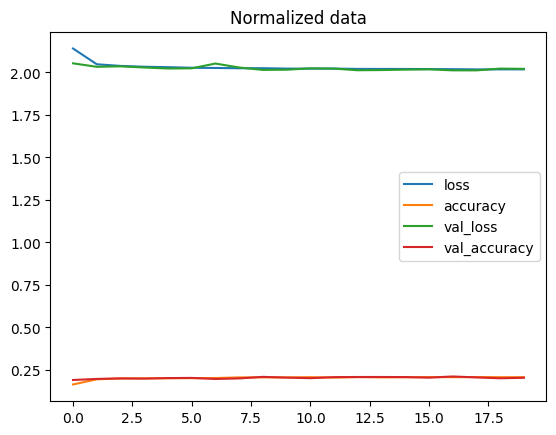

In [52]:
pd.DataFrame(history_4.history).plot(title="Normalized data")

In [53]:
# Maybe need to add more layers to my Model 
# Total of 4 hidden layers
# Learning rate set to 00.01
# epochs set to 40


# Set seed
tf.random.set_seed(42)

# Build model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# Fit the model
history_5=model_5.fit(train_data_norm,
                       train_labels,
                       epochs=40,
                       validation_data=(test_data_norm, test_labels))

Epoch 1/40
1563/1563 [==============================] - 6s 3ms/step - loss: 2.3044 - accuracy: 0.0982 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 2/40
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3042 - accuracy: 0.0976 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 3/40
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3040 - accuracy: 0.1003 - val_loss: 2.3057 - val_accuracy: 0.1000
Epoch 4/40
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3040 - accuracy: 0.0997 - val_loss: 2.3046 - val_accuracy: 0.1000
Epoch 5/40
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3040 - accuracy: 0.1002 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 6/40
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3039 - accuracy: 0.1017 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 7/40
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3038 - accuracy: 0.1015 - val_loss: 2.3042 - val_accuracy:

KeyboardInterrupt: 

In [55]:
# Define the model for model_6 using different approach


# Set seed
tf.random.set_seed(42)

# Build model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# Compile the model
model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history_6=model_6.fit(train_data_norm,
                       train_labels,
                       epochs=15,
                       validation_data=(test_data_norm, test_labels))

Epoch 1/15
1563/1563 [==============================] - 66s 42ms/step - loss: 1.5395 - accuracy: 0.4369 - val_loss: 1.2264 - val_accuracy: 0.5602
Epoch 2/15
1563/1563 [==============================] - 87s 56ms/step - loss: 1.1577 - accuracy: 0.5913 - val_loss: 1.1249 - val_accuracy: 0.6001
Epoch 3/15
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0209 - accuracy: 0.6410 - val_loss: 0.9878 - val_accuracy: 0.6554
Epoch 4/15
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9297 - accuracy: 0.6745 - val_loss: 0.9593 - val_accuracy: 0.6639
Epoch 5/15
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8526 - accuracy: 0.7019 - val_loss: 0.8758 - val_accuracy: 0.6984
Epoch 6/15
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7974 - accuracy: 0.7204 - val_loss: 0.9004 - val_accuracy: 0.6893
Epoch 7/15
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7459 - accuracy: 0.7367 - val_loss: 0.9356 -

<AxesSubplot: title={'center': 'Model 6 Performance'}>

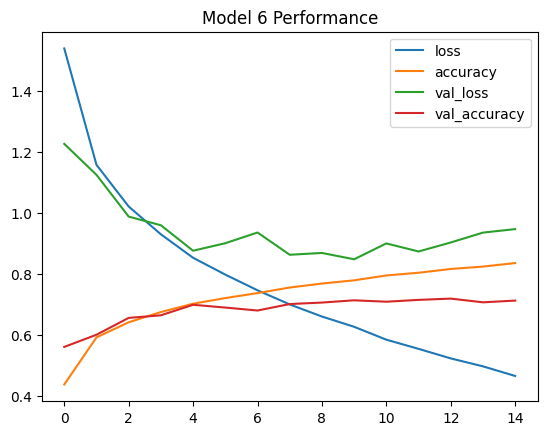

In [57]:
# Plot the normalizes loss curves
pd.DataFrame(history_6.history).plot(title="Model 6 Performance")

Text(0.5, 1.0, 'Find The Ideal Learning Rate')

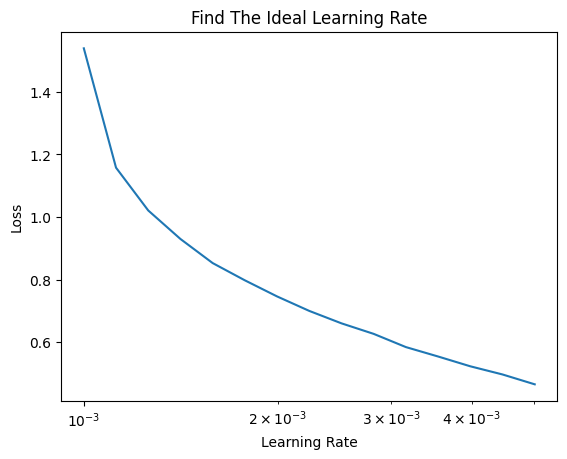

In [58]:
# Now I want to plot the learning rate Curve delay
import matplotlib.pyplot as plt
import pandas as pd

lrs=1e-3 * (10**(tf.range(15)/20))
plt.semilogx(lrs, history_6.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Find The Ideal Learning Rate")

In [59]:
# Model 7 Using the ideal learning rate 4e-3


# Set seed
tf.random.set_seed(42)

# Build model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# Compile the model
learning_rate = 4e-3
model_7.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                metrics=["accuracy"])

# Fit the model
history_7=model_7.fit(train_data_norm,
                       train_labels,
                       epochs=10,
                       validation_data=(test_data_norm, test_labels))

Epoch 1/10
1563/1563 [==============================] - 50s 31ms/step - loss: 1.6748 - accuracy: 0.3813 - val_loss: 1.4267 - val_accuracy: 0.4856
Epoch 2/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.3578 - accuracy: 0.5107 - val_loss: 1.3380 - val_accuracy: 0.5155
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.2534 - accuracy: 0.5522 - val_loss: 1.2408 - val_accuracy: 0.5575
Epoch 4/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.2011 - accuracy: 0.5733 - val_loss: 1.2370 - val_accuracy: 0.5629
Epoch 5/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1477 - accuracy: 0.5939 - val_loss: 1.2264 - val_accuracy: 0.5680
Epoch 6/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1211 - accuracy: 0.6027 - val_loss: 1.1832 - val_accuracy: 0.5846
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0959 - accuracy: 0.6131 - val_loss: 1.2459 -

## Evaluate the Multi-class classification model

Actions to take: 
* Create a confusion matrix 
* Through visualization 
* Improve the results by training for longer 
* Change the architecture
* Save and export the model for an application

In [56]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [61]:
# Make some predictions with the model
y_probs=model_6.predict(test_data_norm)  # probs is short for prediction probablities

y_probs[:5]

313/313 [==============================] - 3s 8ms/step


array([[8.27199779e-04, 2.53827515e-04, 1.98560324e-03, 9.11577940e-01,
        1.26629777e-03, 4.90795672e-02, 5.13133872e-03, 2.29919003e-03,
        1.44588370e-02, 1.31202387e-02],
       [4.26751882e-04, 1.29586468e-02, 8.15720114e-07, 3.93464390e-08,
        1.89367000e-07, 9.24840315e-10, 3.61746366e-08, 7.24187942e-07,
        9.86600935e-01, 1.18538010e-05],
       [7.43941357e-03, 1.33062318e-01, 3.39956209e-03, 7.27721583e-03,
        1.03911525e-03, 2.10972317e-03, 6.53897121e-04, 3.55063868e-03,
        6.46283686e-01, 1.95184365e-01],
       [9.88178492e-01, 2.50416948e-03, 5.23230899e-03, 3.35152527e-06,
        1.32611109e-04, 1.15254466e-07, 1.31096714e-03, 7.24016863e-05,
        1.93113333e-03, 6.34371361e-04],
       [1.41020937e-08, 1.04604874e-06, 1.63571350e-03, 1.20809389e-04,
        9.86503899e-01, 1.82557960e-05, 1.17158387e-02, 4.35140510e-06,
        9.94049856e-08, 6.23146779e-09]], dtype=float32)

In [65]:
# From above shows that predictions made in percentages
# Get the first index and the highest percentage value 
tf.argmax(y_probs[0])

<tf.Tensor: shape=(), dtype=int64, numpy=3>

In [66]:
# Here for the y_probs[0] the model has a higher percentage
class_names[tf.argmax(y_probs[0])]

# Model shows for the prediction value at index 0 it has high percentage for a cat

'cat'

In [67]:
# Convert all prediction probabilites into integers
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([3, 8, 8, 0, 4, 6, 1, 2, 3, 1])

In [70]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
"""  
# Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

# Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) 
     # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

      # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

      # Label the axes
    ax.set(title="Confusion Matrix",
             xlabel="Predicted label",
             ylabel="True label",
             xticks=np.arange(n_classes), # create enough axis slots for each class
             yticks=np.arange(n_classes), 
             xticklabels=labels, # axes will labeled with class names (if they exist) or ints
             yticklabels=labels)

      # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

      # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

      # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)

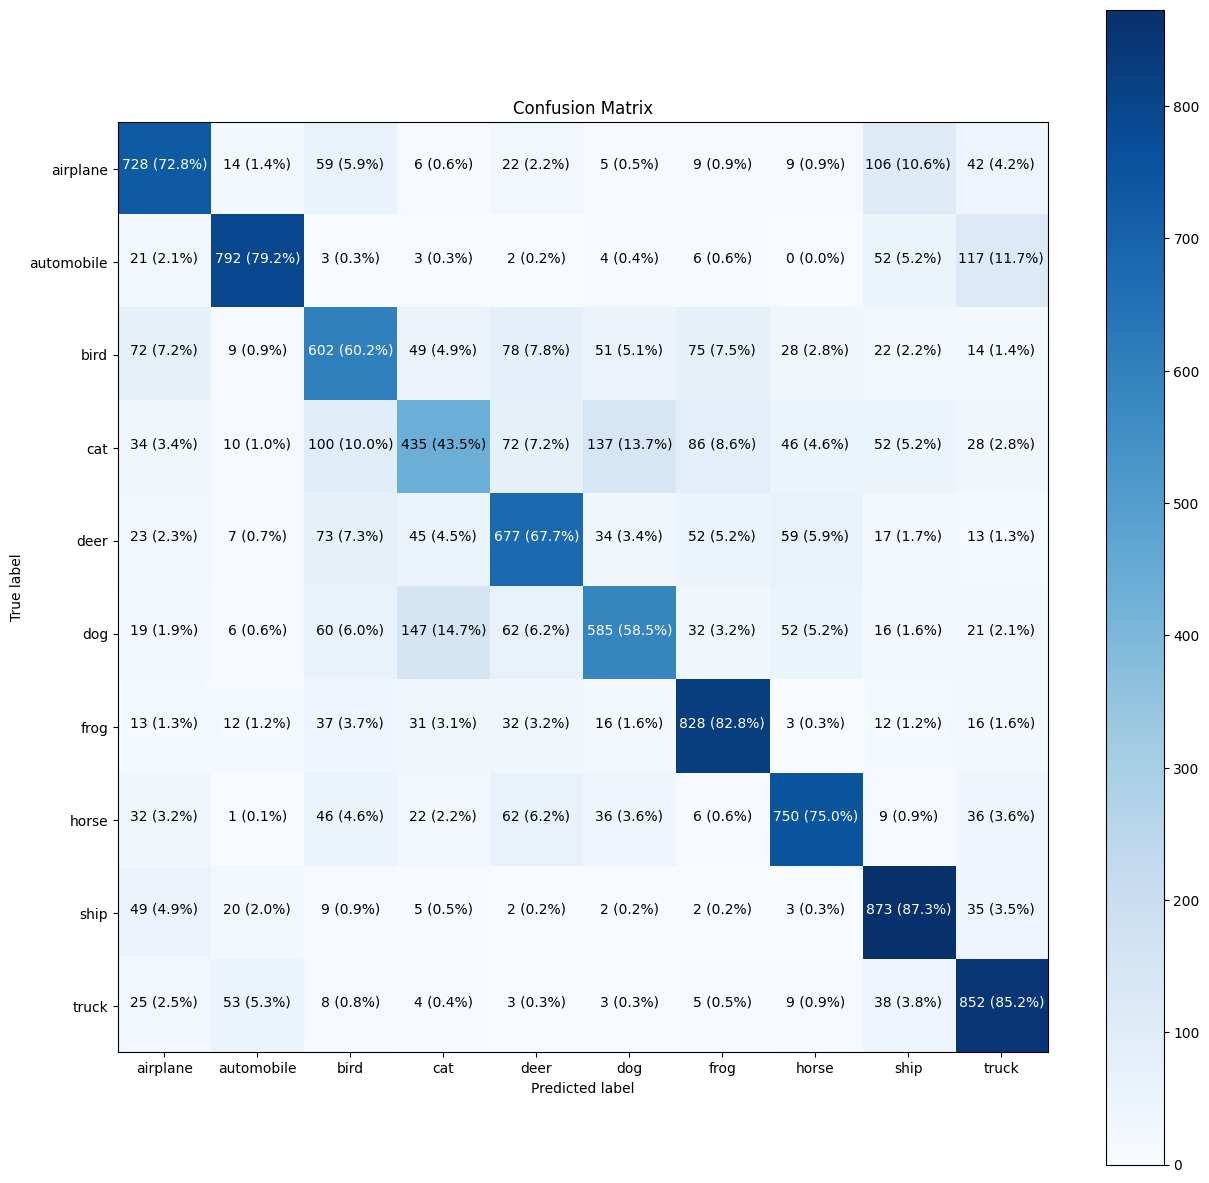

In [71]:
# Use the example function to create a Confusion Matrix: 
make_confusion_matrix(y_true=test_labels,
                     y_pred=y_preds,
                     classes=class_names,
                     figsize=(15,15),
                     text_size=10)

In [77]:
# Layers
model_6.layers

In [79]:
# Extract a layer
model_6.layers[0]

In [81]:
# Get the pattern of a layer in the model
weights, biases = model_6.layers[0].get_weights()

# Shapes
weights, weights.shape

(array([[[[ 1.23565741e-01, -1.13248050e-01,  3.39652114e-02,
            1.62005901e-01,  1.91856846e-01, -1.47476584e-01,
           -7.01980442e-02, -2.12624013e-01,  1.43262580e-01,
            1.94451839e-01,  1.98024079e-01,  1.58785120e-01,
           -1.64826497e-01,  7.03910664e-02,  1.02469049e-01,
           -2.62229204e-01,  1.52983934e-01, -8.52745399e-02,
           -1.63007099e-02, -9.62784514e-02, -1.42668439e-02,
           -7.18092769e-02, -3.36642265e-01,  2.48044007e-03,
           -1.84318349e-01, -2.00816900e-01, -1.44809604e-01,
           -1.30214080e-01,  1.62419558e-01, -2.45951533e-01,
            2.48295106e-02,  2.27507316e-02],
          [ 1.81841597e-01, -1.37012050e-01, -6.22026846e-02,
           -3.50459442e-02,  2.66907901e-01,  1.02143660e-01,
            3.00794452e-01,  6.98536448e-03,  2.14396209e-01,
            1.28811747e-01,  2.22778723e-01,  5.47282398e-02,
           -1.52670339e-01, -2.50181258e-01, -5.95286153e-02,
           -7.87201673e-

In [82]:
model_6.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_12 (Flatten)        (None, 1024)            